# **CONCRETE STRENGTH PREDICTION USING ANN**
#### • Regression is a type of supervised machine learning algorithm used to predict a continuous label. The goal is to produce a model that represents the 'best fit' to some observed data, according to an evaluation criterion.
#### • In this Analysis, you will be predicting the strength of concrete using the given eight features that describe the components used in the mixture. These features are believed to be related to the final compressive strength which include the amount of cement in Kilograms per cubic meter, Blast.Furnace.Slag, Fly.Ash, water,superplasticizer, coarse aggregate, fine aggregate and aging period measured in days.

In [ ]:
!nvidia-smi

### Importing Libraries

In [ ]:
import numpy as np  # Linear algebra
import pandas as pd  # data preprocessing, csv file 1/0 (e.g. pd.read_csv)

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

import seaborn as sns
%matplotlib inline

#for Interactive shells
from IPython.display import display

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
print(tensorflow.__version__)

### Import Dataset

In [ ]:
!dir

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Deep Learning/Regression Using ANN')

In [ ]:
pwd

In [ ]:
df = pd.read_csv('concrete_data.csv')
df.shape

In [ ]:
df.head()

### Exploratory Data Analysis

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
# Summary Statistics
df.describe()

All prediction in the data are quantitive datatypes.Moerover, there are no missing values in the data. Lets analyse the probability distribution of the variables through a series of Univariate Density plots.

In [ ]:
def create_distplot(dataset, columns, rows, cols, title):

  """
  Objective: Create Bistrubitions of all variables

  Params:
  ---------
      dataset: Input pandas dataset
      columns: list, all columns list
      rows: how many number of rows we want to plot
      cols: how many number of cols we want to plot
      tittle: name for all the plots

  Returns:
  """

  fig, axs = plt.subplots(rows, cols, figsize=(16,16))
  fig.suptitle(title,y=0.92, size=16)
  axs = axs.flatten()

  for i, data in enumerate (columns):
    sns.distplot(dataset[data], ax=axs[i])
    axs[i].set_title(data + ', skewness is'+ str(round(dataset[data].skew(axis = 0, skipna = True),2)))

/tmp/ipython-input-20-1869513435.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[data], ax=axs[i])
/tmp/ipython-input-20-1869513435.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[data], ax=axs[i])
/tmp/ipython-input-20-1869513435.py:22: UserWarning: 

`distplot` is a d

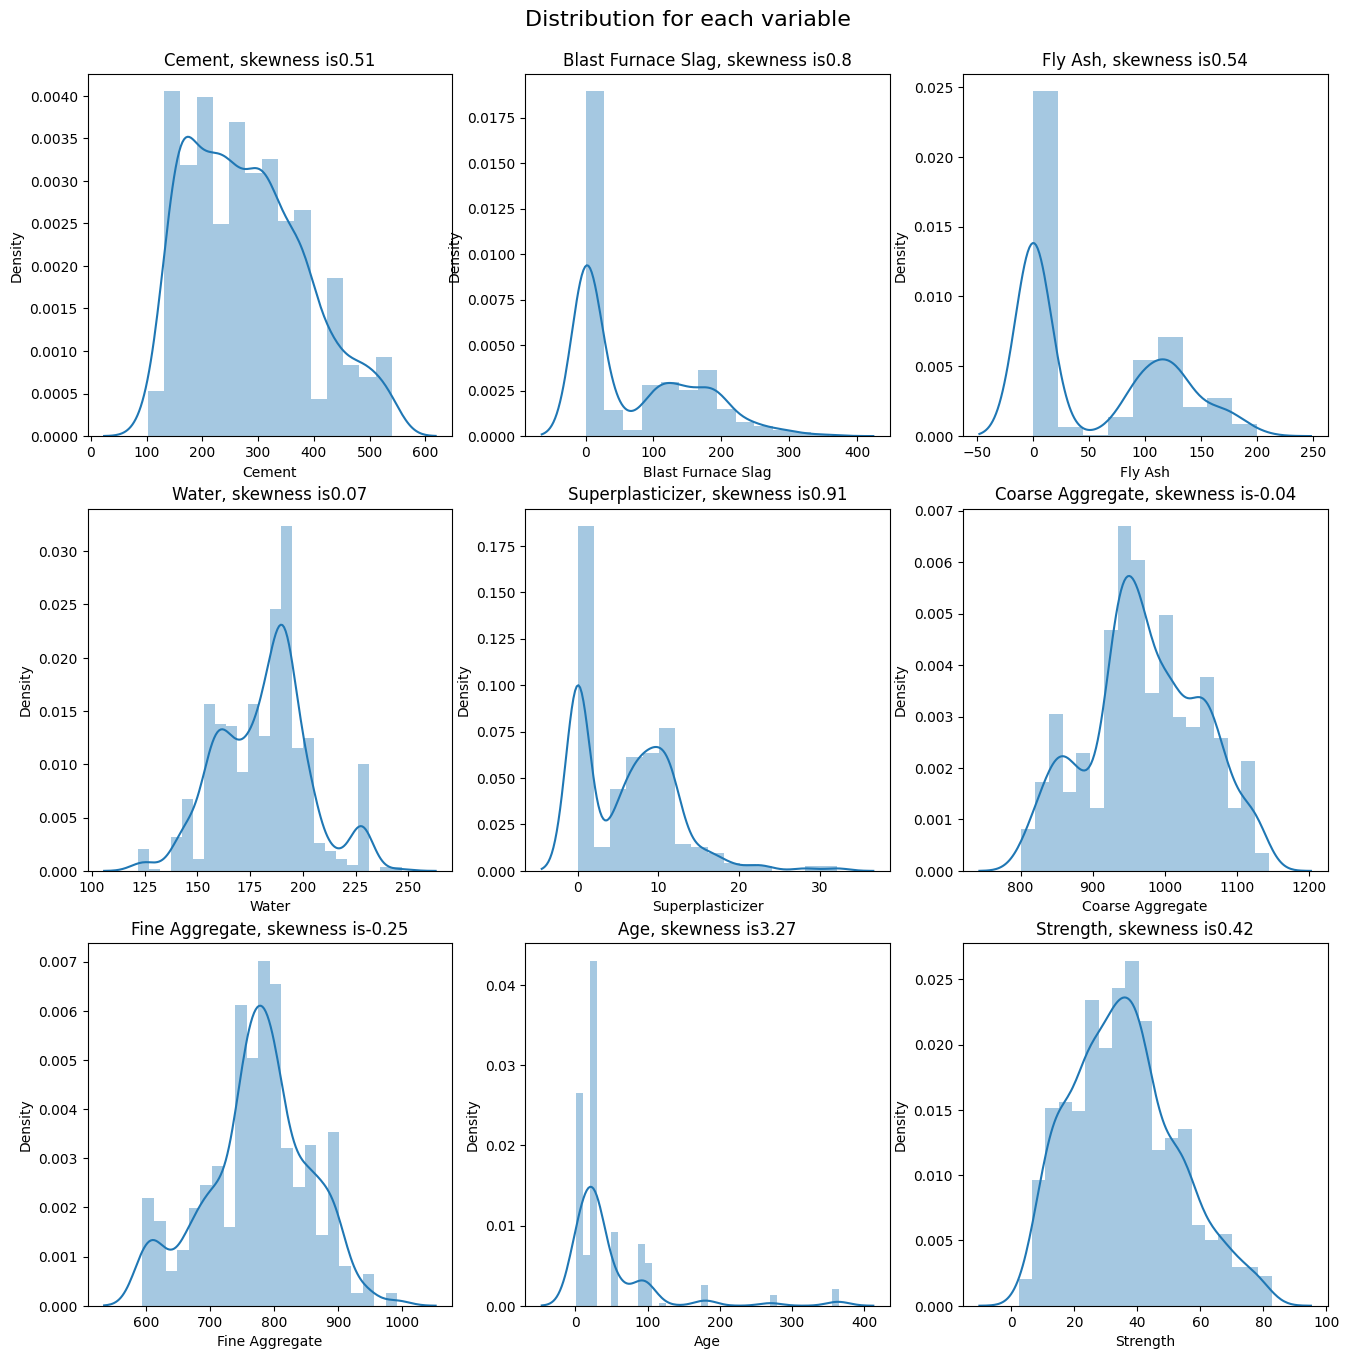

In [21]:
create_distplot(dataset=df, columns=df.columns, rows=3, cols=3, title="Distribution for each variable")

In [22]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
  fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
  fig.suptitle(suptitle,y=0.93, size=16)
  axs = axs.flatten()
  for i,data in enumerate(columns_list):
    if i % 3 == 0:
      axs[i].set_ylabel("The number of entries")
    sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
    axs[i].set_title(data)

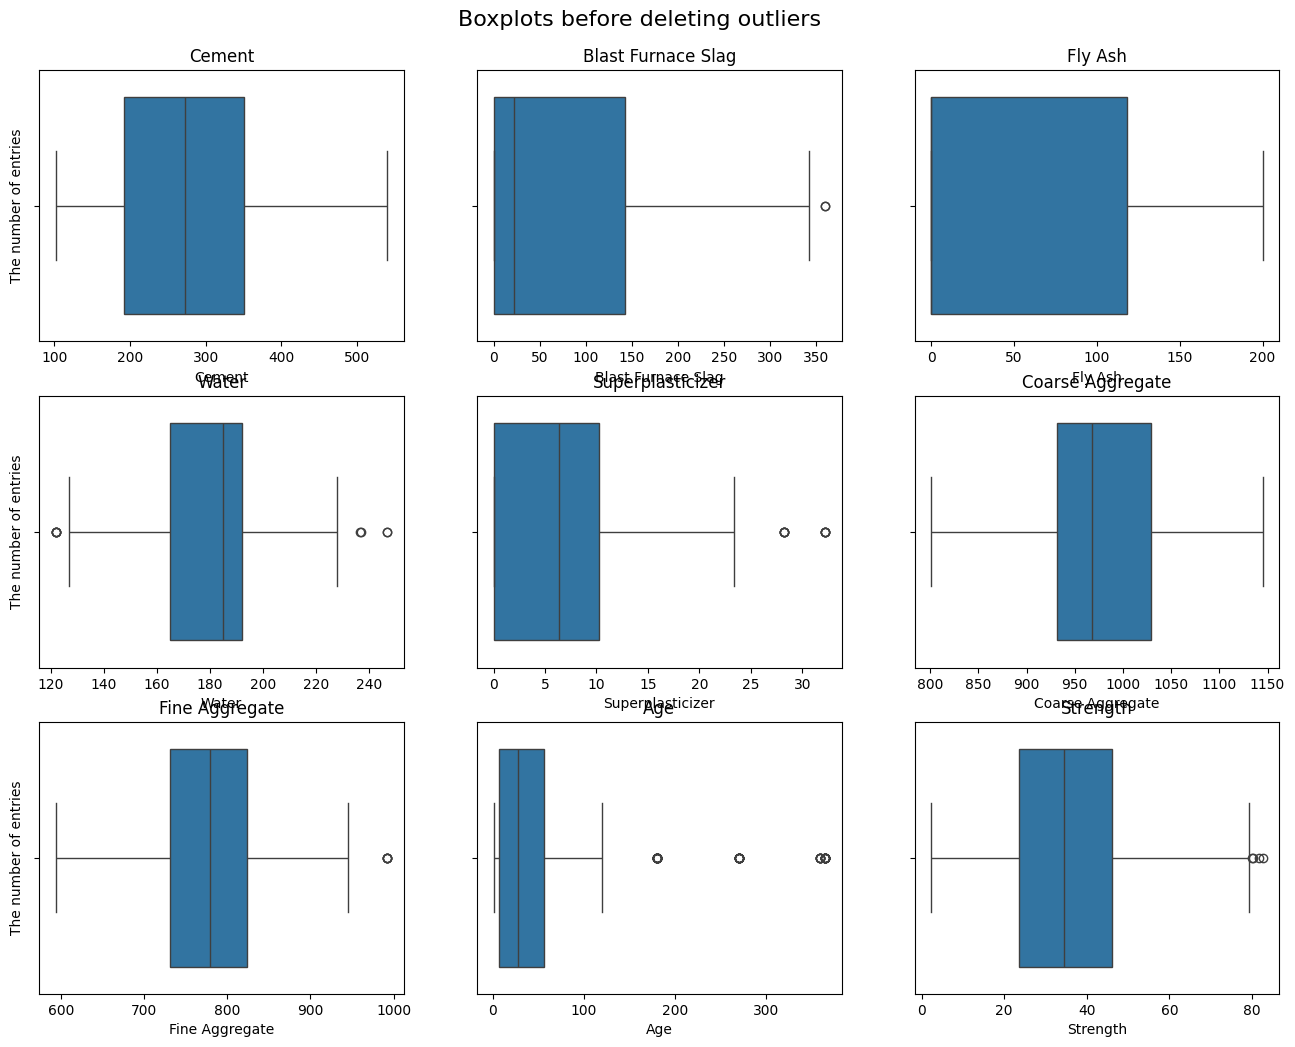

In [23]:
boxplots_custom(dataset=df, columns_list=df.columns, rows=3, cols=3, suptitle="Boxplots before deleting outliers")

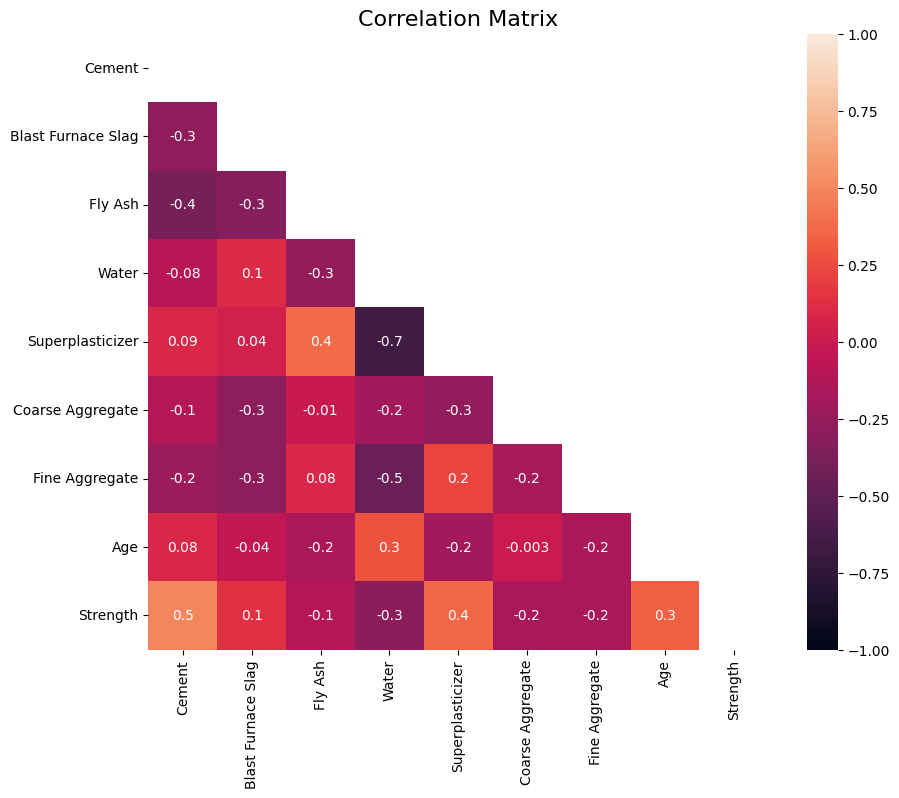

In [24]:
# calculatinf the corelation matrix
corr = df.corr()
matrix = np.triu(corr)
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmax=1.0, vmin=-1.0,fmt='.1g', annot=True, mask=matrix)

plt.title('Correlation Matrix',size=16)
plt.show()

The pearsons correlation assumes normality, linearity , homoscedasticity and no outliers. These assumptions are violated for most variables. This may be a potential reason as to why pearsons correlation won't detect nuances between predictors and the independent variables properly. Additionally, the relationship between inputs does seem to be largely non-linear. Nonetheless, cement, water, and superplasticizer do seem to be moderately correlated with strength.

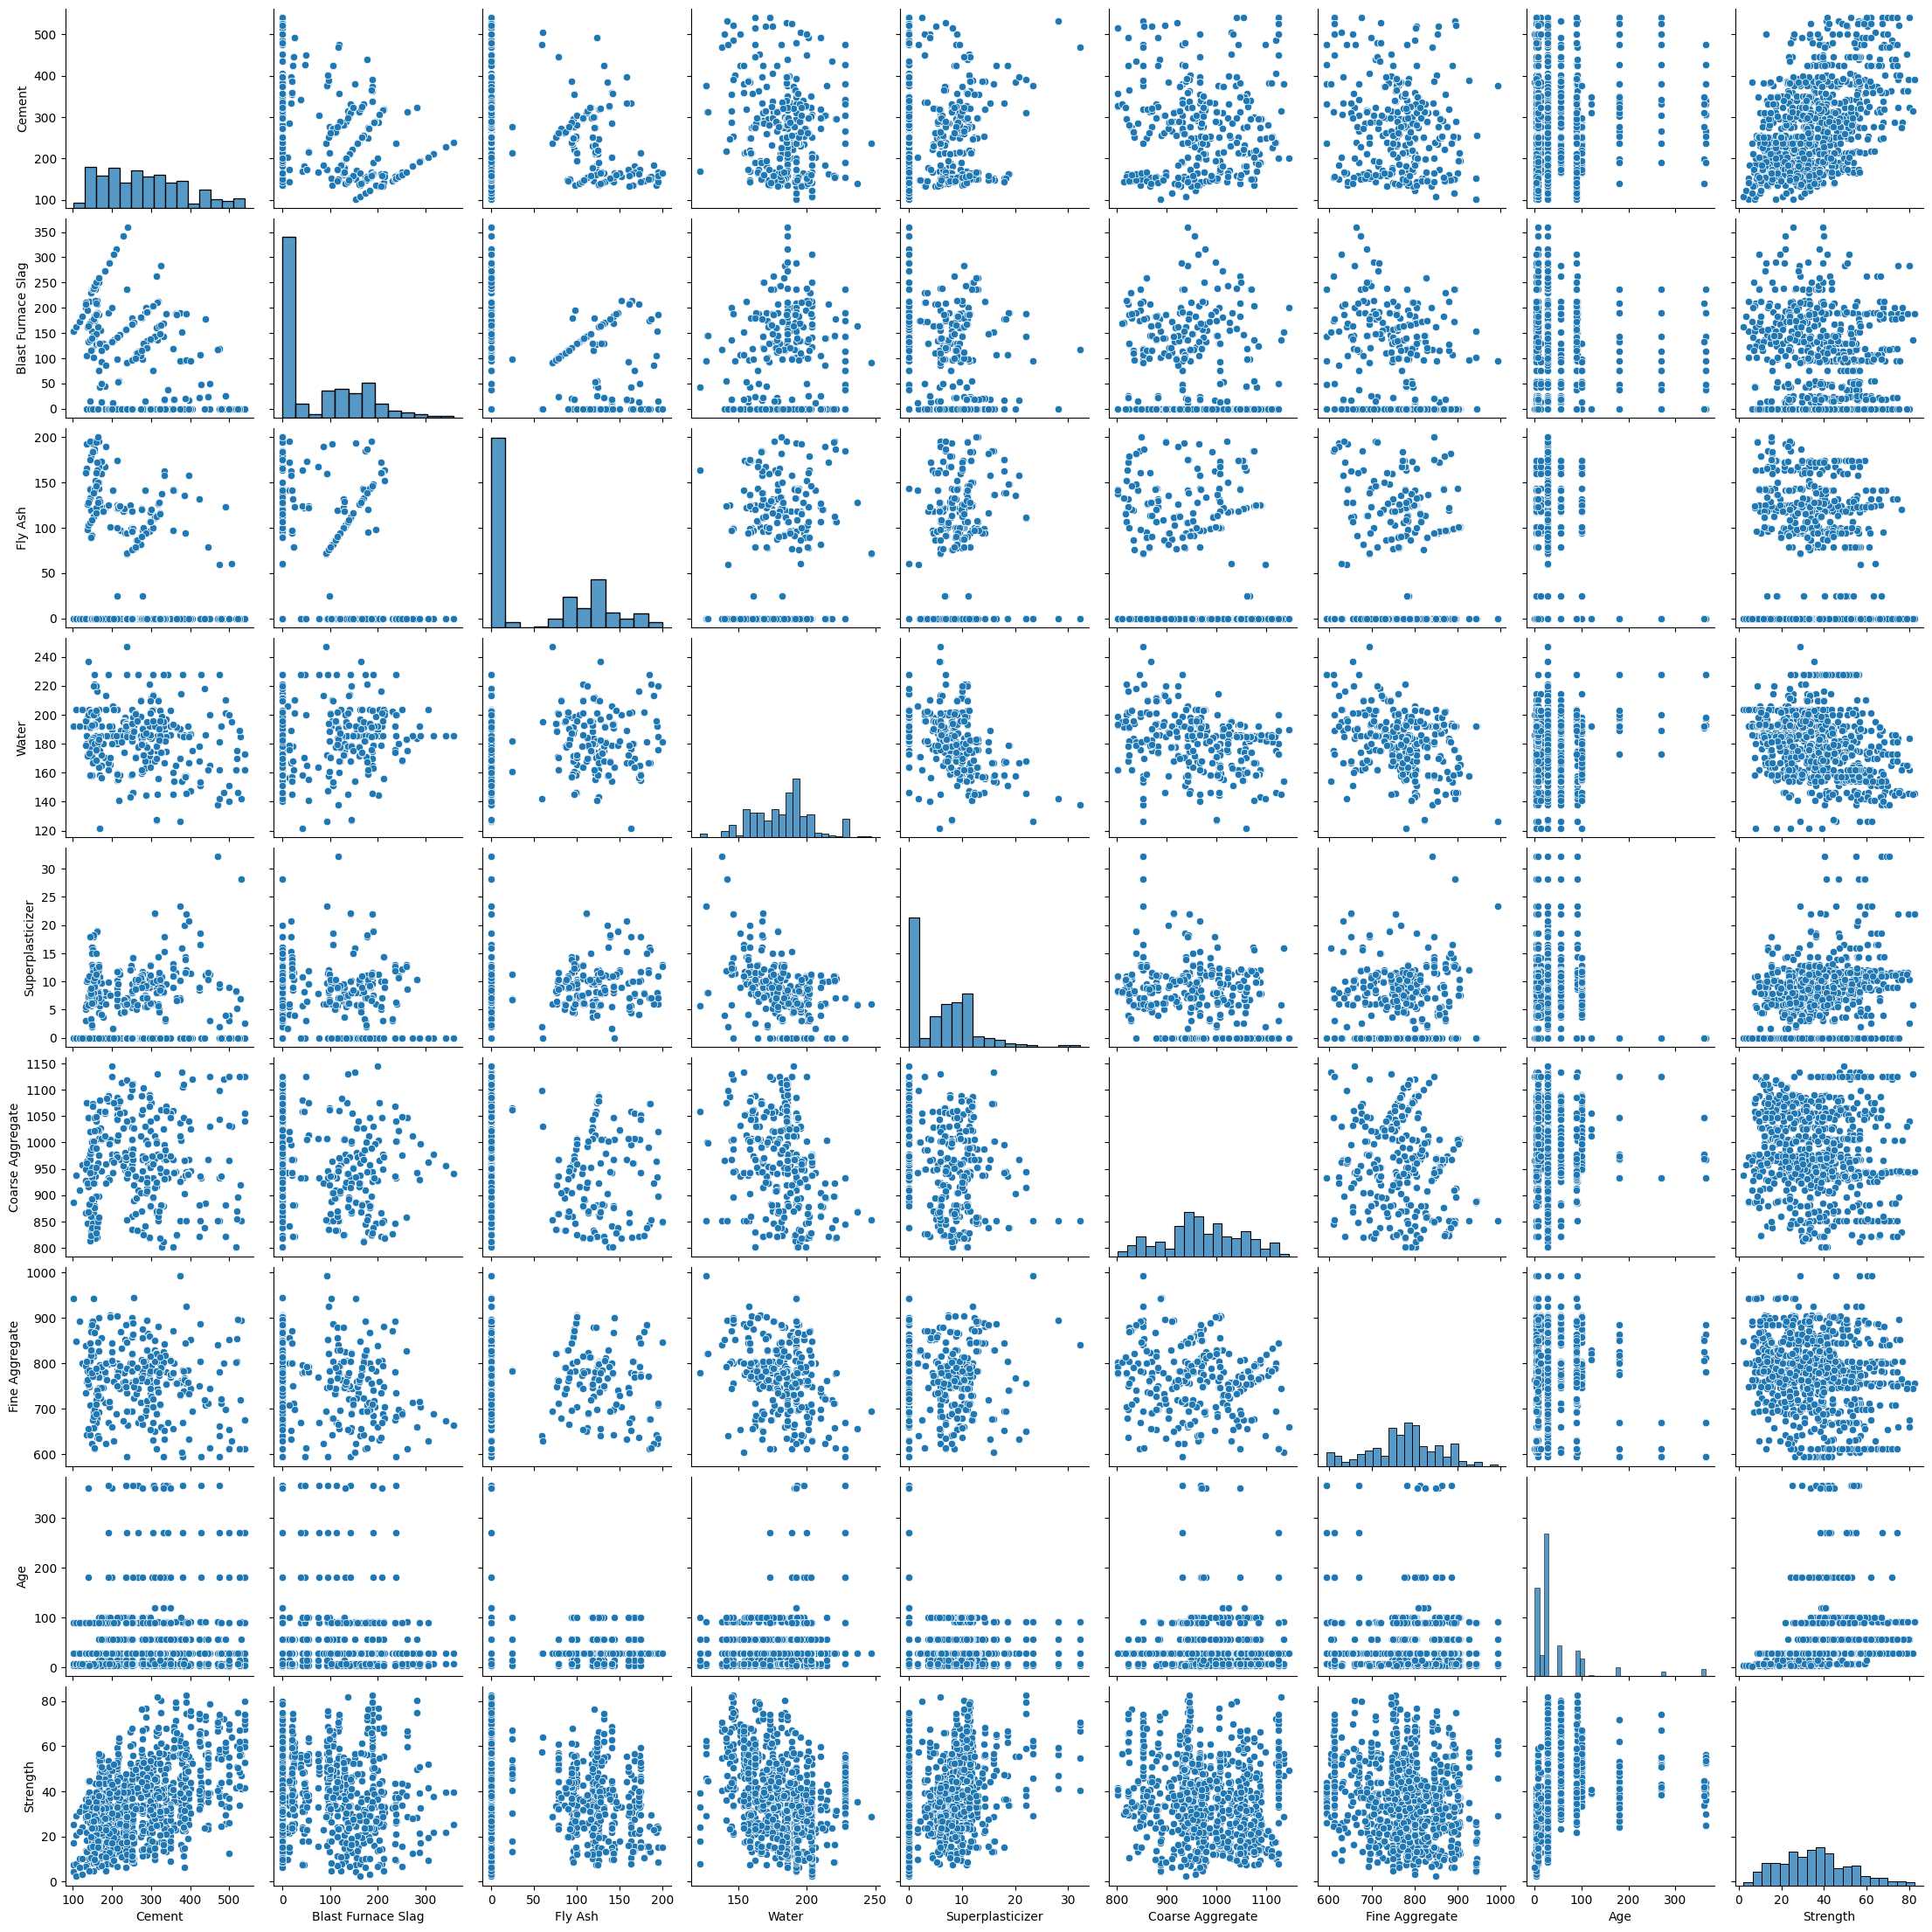

In [25]:
sns.pairplot(data=df,diag_kind="hist")
plt.show()

### Data Processing

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [27]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle = True,
                                                    random_state = 43)

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train

array([[-0.6267737 , -0.86073957,  1.90187148, ...,  1.01212601,
         0.00805866,  0.8581784 ],
       [-0.27731315, -0.86073957,  0.66901799, ..., -0.21696042,
         1.05976169, -0.504752  ],
       [-0.39028944,  0.98130096, -0.83396389, ...,  0.86138899,
        -0.4975442 , -0.28287961],
       ...,
       [ 0.23969699,  0.02084154, -0.83396389, ..., -0.53775971,
        -1.28662828,  2.12602064],
       [-0.26390918, -0.86073957,  1.02395416, ...,  0.70421023,
        -0.21038141,  0.16086518],
       [-0.63634796, -0.86073957,  0.74283215, ...,  0.43881001,
         1.58009085, -0.504752  ]])

In [30]:
X_train.shape[1]

8

### Model Building using Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
#Create a model object
lm = LinearRegression()
#Train the model object
lm.fit(X_train,y_train)

#Print intercept and coefficients
print(lm.intercept_)#parameters it automically gets generated  B0 (bita 0 value)
print(lm.coef_)# parameters(slope  coefficient value)

35.22177184466022
[12.316255    8.80486058  5.31614671 -2.74623944  2.09890498  1.77280342
  1.70816381  7.18181108]


In [32]:
#Predict using the model
Y_pred = lm.predict(X_test)
print(Y_pred)

[21.74380703 50.97756174 23.58694624 56.31642573 33.72766874 39.93437891
 34.12386644 30.54308314 36.9272201  33.83875586 33.91952801 32.41783916
 23.98456579 43.05844713 31.09547357 46.55655861 60.68246245 59.29174845
 21.59152164 37.03226029 27.62722687 33.23061066 27.62811416 56.09862746
 52.58888836 34.76810277 41.815647   52.90365082 27.33579117 53.70195843
 36.22892425 39.03089023 60.22168135 50.52156788 55.11335285 41.20200373
 48.01124311 74.70873138 57.17104358 30.61833584 49.02431124 52.61696625
 18.64921866 54.05706442 28.87034181 35.61283349 35.14530098 47.53078837
 49.77152769 32.79616844 36.66917749 33.59190142 45.12208316 23.39255756
 37.58156785 59.88380804 23.72379473 52.0757161  36.76346655 68.95331161
 26.0837982  34.51053993 29.28005147 48.12924197 39.27789128 38.10437034
 25.27942437 23.58333947 49.40199717 49.22807732 50.97756174 58.02427205
 43.9055884  36.10551743 34.3247349  26.22239102 27.94894125 49.05930991
 27.24395163 52.0574     20.54020299 57.27920115 22

In [33]:
lm.score(X_train, y_train)

0.6145176139976554

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
# this is the real value that we need to check because its getting on test data

R-squared: 0.60479925088094
RMSE: 10.503294171775092
Adj R-square: 0.6017026730230042


### Model Building using ANN

In [39]:
# Improving the ANN

from tensorflow.keras.models import Sequential
model1 = Sequential()

# Adding the input layer and the first hidden layer
model1.add(Dense(units = 800,
                 kernel_initializer = 'uniform',
                 activation = 'relu',
                 input_dim = X_train.shape[1]))

# Adding the second hidden layer
model1.add(Dense(units = 1200,
                 kernel_initializer = 'uniform',
                 activation = 'relu'))

# Adding the Third hidden layer
model1.add(Dense(units = 1800, kernel_initializer = 'uniform',activation = 'relu'))

# Adding the fourth hidden layer
model1.add(Dense(units = 2000, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
model1.add(Dense(units = 3000, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model1.add(Dense(units = 1,kernel_initializer = 'uniform', activation = 'linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 800)            │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1200)           │       961,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1800)           │     2,161,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2000)           │     3,602,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3000)           │     6,003,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │         3,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,738,201 (48.59 MB)

 Trainable params: 12,738,201 (48.59 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Comiling the ANN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
EPOCHS = 50
# Fitting the ANN to the Training set
history = model1.fit(X_train,
                     y_train,
                     epochs=EPOCHS,
                     validation_split=0.1,
                     verbose = 1)

# save trained model
model1.save("trained_model_{}.h5".format(EPOCHS))

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 656.1715 - val_loss: 341.0530
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 207.0082 - val_loss: 170.1458
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 136.5629 - val_loss: 129.7133
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88.8417 - val_loss: 88.0107
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 69.2736 - val_loss: 66.8993
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 56.3664 - val_loss: 55.5032
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 46.7309 - val_loss: 44.7418
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32.5693 - val_loss: 46.2400
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32.2594 - val_loss: 41.5337
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27.7167 - val_loss: 48.1022
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.7549 - val_loss: 56.1682
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━

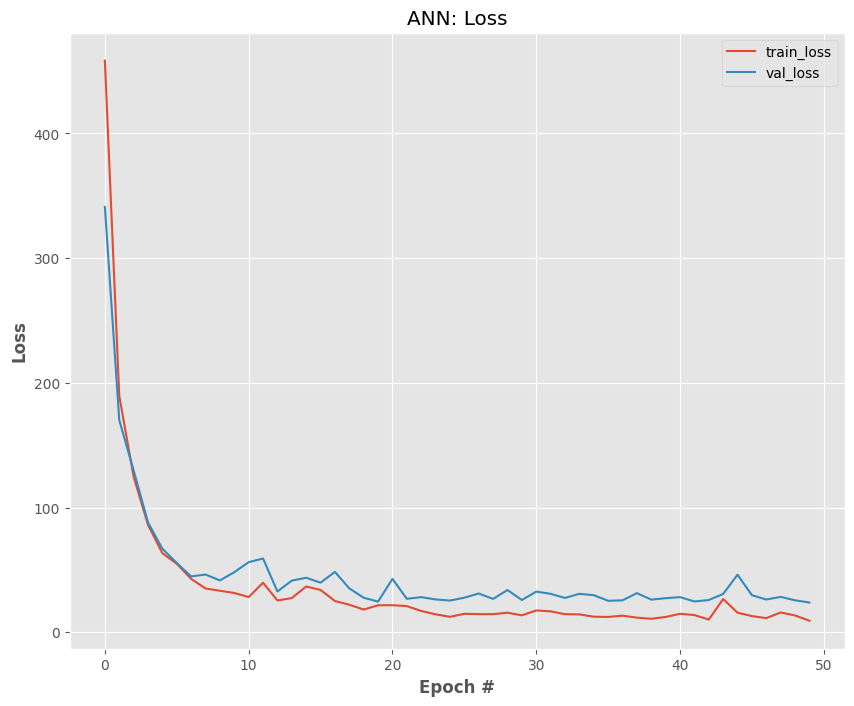

In [44]:
# plot the training and validation loss
history_df = pd.DataFrame(history.history)

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, history_df["loss"], label="train_loss")
plt.plot(N, history_df["val_loss"], label="val_loss")
plt.title("ANN: Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [45]:
y_pred = model1.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8539633346117106

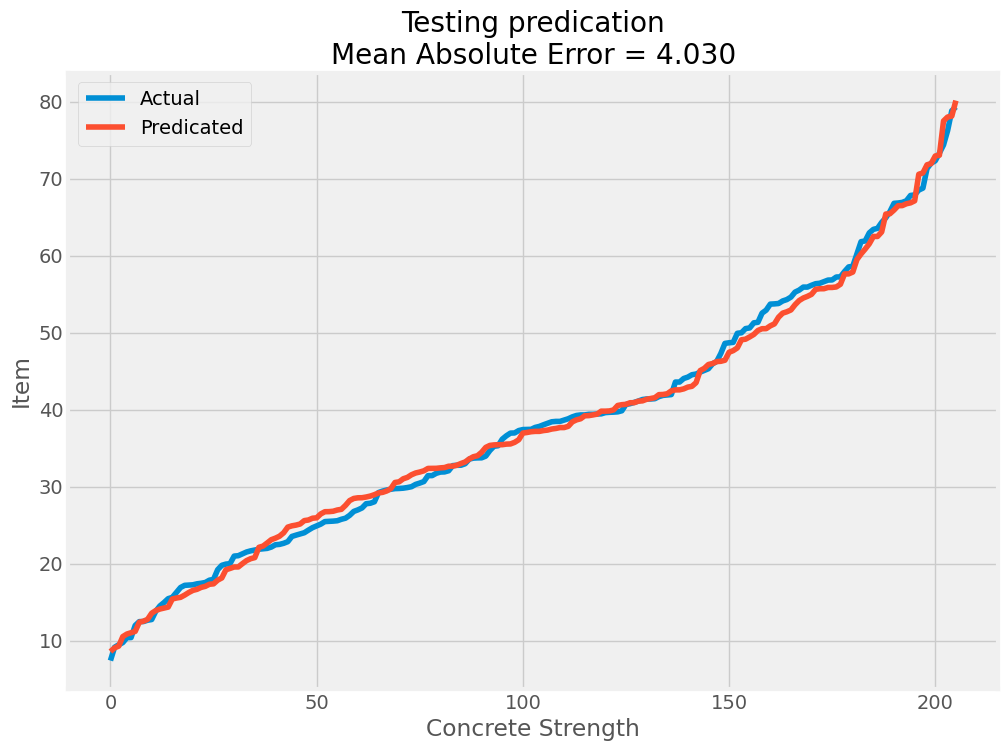

In [47]:
MAE = mae(y_test, y_pred)

plt.figure(figsize=(12,8))
with plt.style.context('fivethirtyeight'):

  plt.plot(sorted(y_test), label='Actual')
  plt.plot(sorted(y_pred), label='Predicated')

  plt.title("Testing predication\nMean Absolute Error = {:.3f}".format(MAE))
  plt.xlabel("Concrete Strength")
  plt.ylabel("Item")
  plt.legend()
plt.show()